In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
# importing dataset

df = pd.read_csv('Travel Insurance.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
# removing unnecessary columns

df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [5]:
# extracting target label

target = df.columns[-1]
target

'TravelInsurance'

### Encoding categorical variables

In [6]:
# replacing Yes with 1 and No with 0

df['GraduateOrNot'] = df['GraduateOrNot'].replace({'Yes':1, 'No':0})
df['FrequentFlyer'] = df['FrequentFlyer'].replace({'Yes':1, 'No':0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].replace({'Yes':1, 'No':0})
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


In [7]:
# variables on which one-hot encoding is to be performed

cat_variables = ['Employment Type']

In [8]:
# one-hot encoding categorical variables  

df_encoded = pd.get_dummies(data =df, prefix=cat_variables, columns=cat_variables)
df_encoded.head()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed
0,31,1,400000,6,1,0,0,0,True,False
1,31,1,1250000,7,0,0,0,0,False,True
2,34,1,500000,4,1,0,0,1,False,True
3,28,1,700000,3,1,0,0,0,False,True
4,28,1,700000,8,1,1,0,0,False,True


**Employment Type_Government Sector** and **Employment Type_Private Sector/Self Employed** are opposite to each other 

In [9]:
# Dropping column 'Employment Type_Private Sector/Self Employed'

df_encoded.drop('Employment Type_Private Sector/Self Employed', axis=1, inplace=True)
df_encoded.head()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Employment Type_Government Sector
0,31,1,400000,6,1,0,0,0,True
1,31,1,1250000,7,0,0,0,0,False
2,34,1,500000,4,1,0,0,1,False
3,28,1,700000,3,1,0,0,0,False
4,28,1,700000,8,1,1,0,0,False


### Extracting Features and Target

In [10]:
# getting list of features

features = [x for x in df_encoded.columns if x not in target]
features

['Age',
 'GraduateOrNot',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases',
 'FrequentFlyer',
 'EverTravelledAbroad',
 'Employment Type_Government Sector']

In [ ]:
# extracting feature array from dataframe

x_df = df_encoded.drop(target, axis=1)
x = np.array(x_df)
x[:5]

In [ ]:
x.shape

In [13]:
y = np.array(df_encoded[target])
y = np.expand_dims(y, axis =1)
y[:5]

array([[0],
       [0],
       [1],
       [0],
       [0]], dtype=int64)

In [14]:
y.shape

(1958, 1)

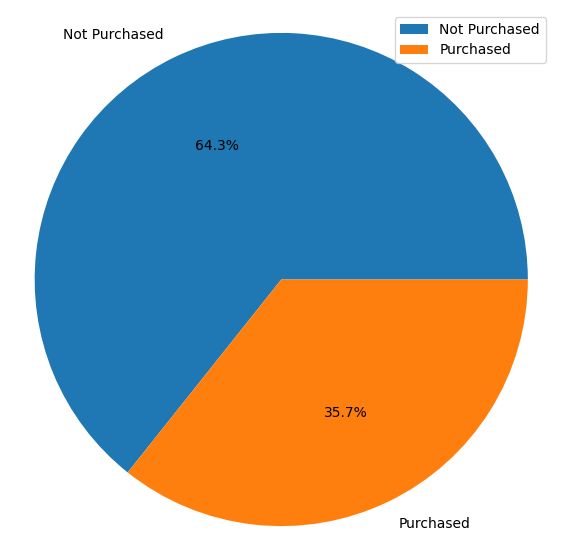

In [15]:
from utils import plot_pie
plot_pie(y)

## Model selection 

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [17]:
x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

In [18]:
depths = [2,3, 4, 5, 6, 7, 8, 9]
val_f1_score = []

In [19]:
for depth in depths:
    # Train a decision tree model
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(x_train, y_train)
    
    # Evaluate on the validation set using F1 score
    y_val_pred = model.predict(x_val)
    f1 = f1_score(y_val, y_val_pred)
    val_f1_score.append(f1)
    

In [20]:
val_f1_score

[0.6334841628959276,
 0.7540983606557377,
 0.743801652892562,
 0.736842105263158,
 0.7419354838709677,
 0.7258064516129031,
 0.7351778656126482,
 0.728]

In [21]:
depth_index = np.argmax(val_f1_score)

In [22]:
best_depth = depths[depth_index]
best_depth

3

In [23]:
best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_model.fit(x_train, y_train)
y_test_pred = best_model.predict(x_test)
f1_test = f1_score(y_test, y_test_pred)
f1_test

0.672340425531915

## Saving Model

In [24]:
import joblib

In [25]:
with open('savedmodel.joblib', 'wb') as f:
    joblib.dump(best_model, f)

## Loading trained model

In [26]:
with open('savedmodel.joblib', 'rb') as f:
    model = joblib.load(f)

In [27]:
print('Enter the following data:\n')
x_input = []
for i in range(len(features)):
    print(features[i])
    x_i = float(input())
    x_input.append(x_i)
    
x_input = np.array(x_input).reshape(1,len(x_input))
pred = best_model.predict(x_input)
pred

Enter the following data:

Age
21
GraduateOrNot
1
AnnualIncome
14000000
FamilyMembers
5
ChronicDiseases
1
FrequentFlyer
1
EverTravelledAbroad
1
Employment Type_Government Sector
0


array([1], dtype=int64)